In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from matplotlib import cm 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ghassenabdedayem/AltCoins/master/data_sources/df_BTC_J7.csv',
                 sep = ',', 
                 parse_dates=[0], 
                 index_col=0, 
                 squeeze=True)
df.head()

,BTC_Close,BTC_Intraday,BTC_Close_1,BTC_Close_2,BTC_Close_3,BTC_Close_4,BTC_Close_5,BTC_Close_6,BTC_Close_7,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,...,EURUSD_Close_3,EURUSD_Close_4,EURUSD_Close_5,EURUSD_Close_6,EURUSD_Close_7,CNYUSD_Close_1,CNYUSD_Close_2,CNYUSD_Close_3,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,-0.024739,0.042715,0.039930,-0.009029,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.007835,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,-0.006344,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.006101,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.017741,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.005158,0.000000,-0.009405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.007813,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,0.000000,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000
2019-11-29,0.039930,0.043029,-0.009029,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.045276,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,0.000000,-0.009405,-0.007059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179
2019-11-28,-0.009029,0.037027,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.045276,-0.047963,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.009405,-0.007059,0.012282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500
2019-11-27,0.043364,0.092486,0.010076,0.014049,-0.047316,0.013843,-0.045276,-0.047963,-0.021813,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.015337,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.007508,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.009434,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.029219,-0.007059,0.012282,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,0.004495,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,0.005001,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500,0.003674
2019-11-26,0.010076,0.031276,0.014049,-0.047316,0.013843,-0.045276,-0.047963,-0.021813,-0.012396,0.048935,0.000000,0.000000,0.003378,-0.004735,0.015337,-0.020209,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.0075

In [0]:
df['Weekday'] = df.index.weekday
df['Month'] = df.index.month

In [4]:
df.head()

,BTC_Close,BTC_Intraday,BTC_Close_1,BTC_Close_2,BTC_Close_3,BTC_Close_4,BTC_Close_5,BTC_Close_6,BTC_Close_7,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,...,EURUSD_Close_5,EURUSD_Close_6,EURUSD_Close_7,CNYUSD_Close_1,CNYUSD_Close_2,CNYUSD_Close_3,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7,Weekday,Month
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,-0.024739,0.042715,0.039930,-0.009029,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.007835,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,-0.006344,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.006101,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.017741,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.005158,0.000000,-0.009405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.007813,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,0.000000,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000,5,11
2019-11-29,0.039930,0.043029,-0.009029,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.045276,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,0.000000,-0.009405,-0.007059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179,4,11
2019-11-28,-0.009029,0.037027,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.045276,-0.047963,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.009405,-0.007059,0.012282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500,3,11
2019-11-27,0.043364,0.092486,0.010076,0.014049,-0.047316,0.013843,-0.045276,-0.047963,-0.021813,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.015337,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.007508,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.009434,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.029219,-0.007059,0.012282,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,0.004495,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,0.005001,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500,0.003674,2,11
2019-11-26,0.010076,0.031276,0.014049,-0.047316,0.013843,-0.045276,-0.047963,-0.021813,-0.012396,0.048935,0.000000,0.000000,0.003378,-0.004735,0.015337,-0.020209,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.007508,0.035356,0.008762,0.00000

In [10]:
df_price = pd.read_csv('https://raw.githubusercontent.com/ghassenabdedayem/AltCoins/master/data_sources/df_global_final.csv', 
                 sep = ',', 
                 parse_dates=[0], 
                 index_col=0, 
                 squeeze=True)
df_price.head()

,GOLD_USD_AM,GOLD_USD_PM,GOLD_GBP_AM,GOLD_GBP_PM,GOLD_EUR_AM,GOLD_EUR_PM,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Market_Cap,BTC_Intraday,ADA_Open,ADA_High,ADA_Low,ADA_Close,ADA_Volume,ADA_Market_Cap,ADA_Intraday,LTC_Open,LTC_High,LTC_Low,LTC_Close,LTC_Volume,LTC_Market_Cap,LTC_Intraday,EOS_Open,EOS_High,EOS_Low,EOS_Close,EOS_Volume,EOS_Market_Cap,EOS_Intraday,ETH_Open,ETH_High,ETH_Low,ETH_Close,ETH_Volume,ETH_Market_Cap,...,IEF_Low,IEF_Close,IEF_Volume,NVIDIA_Open,NVIDIA_High,NVIDIA_Low,NVIDIA_Close,NVIDIA_Volume,AMD_Open,AMD_High,AMD_Low,AMD_Close,AMD_Volume,GOOGLE_Open,GOOGLE_High,GOOGLE_Low,GOOGLE_Close,GOOGLE_Volume,GPS_Open,GPS_High,GPS_Low,GPS_Close,GPS_Volume,COCOA_Open,COCOA_High,COCOA_Low,COCOA_Close,COCOA_Volume,IBM_Open,IBM_High,IBM_Low,IBM_Close,IBM_Volume,GGTrends_values,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
GOLD_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7764,7836,7515,7569,17158194786,136829391049,321,0.041416,0.042268,0.040068,0.040425,64184926,1048107282,0.002200,48.91,49.28,47.09,47.48,2678481167,3026175357,2.19,2.80,2.83,2.74,2.76,1537950803,2598670742,0.09,155,156,151,152,6565950868,16589132426,...,111.660,111.66,0.0,216.53,216.53,216.53,216.53,0.0,39.16,39.16,39.160,39.16,0.0,1304.98,1304.980,1304.98,1304.98,0.0,16.61,16.610,16.610,16.61,0.0,2512.405,2512.405,2512.405,2512.405,0.0,134.45,134.45,134.45,134.45,0.0,8.928571,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
2019-11-29,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7466,7781,7460,7761,19709695456,140280108521,321,0.039227,0.042040,0.039194,0.041423,99506198,1073986624,0.002846,47.09,49.32,47.09,48.88,2944492393,3115330867,2.23,2.64,2.80,2.64,2.80,1899935358,2636173142,0.16,151,156,151,155,7503898278,16887922522,...,111.440,111.66,1798695.0,217.00,218.14,215.78,216.53,1881106.0,39.07,39.51,39.020,39.16,7526362.0,1305.50,1310.205,1303.97,1304.98,392185.0,16.91,16.930,16.570,16.61,1311527.0,2512.405,2512.405,2512.405,2512.405,0.0,133.59,134.51,133.04,134.45,773921.0,9.464286,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2019-11-28,1458.0,1455.0,1127.27,1127.35,1323.60,1321.84,7536,7730,7454,7463,19050116751,134879411013,276,0.039129,0.039990,0.038641,0.039190,60743403,1016079672,0.001349,48.00,48.55,47.02,47.06,2662459127,2998875250,1.53,2.69,2.76,2.62,2.64,1514999632,2483560320,0.14,153,156,151,151,7346531960,16496129470,...,111.660,111.66,0.0,218.24,218.24,218.24,218.24,0.0,39.41,39.41,39.410,39.41,0.0,1312.99,1312.990,1312.99,1312.99,0.0,16.91,16.910,16.910,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,133.76,133.76,133.76,133.76,0.0,10.714286,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-27,1459.8,1454.0,1134.12,1129.74,1326.23,1322.30,7220,7619,6974,7531,23991412764,136102712894,645,0.036955,0.039800,0.035783,0.039049,76841561,1012420887,0.004017,47.16,48.52,45.44,48.01,2979663352,3059223170,3.08,2.63,2.73,2.53,2.69,2247567344,2532133843,0.20,148,154,143,153,8778095308,16634910472,...,111.605,111.66,2334424.0,218.67,220.02,217.18,218.24,5314571.0,39.50,39.76,39.080,39.41,33127997.0,1315.00,1318.187,1309.63,1312.99,989345.0,17.01,17.150,16.710,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,135.28,135.70,133.63,133.76,0.0,11.428571,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-26,1458.0,1455.0,1133.76,1131.86,1322.96,1321.11,7145,7320,7098,7218,21129505542,130429018720,222,0.036046,0.037074,0.035705,0.036993,57431470,959117573,0.001369,45.81,47.54,45.66,47.27,2659405400,3012041642,1.88,2.53,2.65,2.53,2.63,1894353525,2479535254,0.12,146,150,145,148,7648516297,16193326033,...,111.850,111.95,3578750.0,220.50,220.69,216.75,217.00,9487105.0,38.99,39.48,38.815,38.99,42706750.0,1309.86,1314.760,1305.09,1313.55,1011135.0,17.11,17.265,16.855,17.01,0.0,2512.405,2512.405,2512.405,2512.405,0.0,136.01,136.15,134.77,135.03,0.0,11.785714,-0.222521,0.974928,0.866025,-0.5,1.0,-2.449294e-16


In [0]:
other_columns = ['BTC_Volume',
                 'BTC_Market_Cap',
                 'BTC_Market_Cap',
                 'Day_Cos',
                 'Day_Sin',
                 'Month_Cos',
                 'Month_Sin',
                 'Quarter_Cos',
                 'Quarter_Sin']



	
	
	
	
	


In [7]:
i = 0
single_col = []
for col in df.columns :
  i += 1
  if i % 7 == 3 or i > 114:
    single_col.append(col)
print(single_col)


['BTC_Close_1', 'NVIDIA_Close_1', 'AMD_Close_1', 'GOOGLE_Close_1', 'GPS_Close_1', 'IBM_Close_1', 'GOLD_USD_PM_1', 'EURGBP_Close_1', 'EURHUF_Close_1', 'EURJPY_Close_1', 'EURUSD_Close_1', 'CNYUSD_Close_1', 'GBPUSD_Close_1', 'IBB_Close_1', 'ICE_Close_1', 'IEF_Close_1', 'Weekday', 'Month']


In [0]:
df[['BTC_Close', 'BTC_Intraday', 'NVIDIA_Close_1', 'AMD_Close_1', 'GOOGLE_Close_1', 'GPS_Close_1', 
    'IBM_Close_1', 'GOLD_USD_PM_1', 'EURGBP_Close_1', 'EURHUF_Close_1', 'EURJPY_Close_1', 'EURUSD_Close_1', 
    'CNYUSD_Close_1', 'GBPUSD_Close_1', 'IBB_Close_1', 'ICE_Close_1', 'IEF_Close_1', 'Weekday', 'Month']].corr()['BTC_Close']

BTC_Close         1.000000
BTC_Intraday     -0.067099
NVIDIA_Close_1    0.009299
AMD_Close_1      -0.016875
GOOGLE_Close_1    0.026085
GPS_Close_1      -0.000368
IBM_Close_1      -0.006759
GOLD_USD_PM_1    -0.013557
EURGBP_Close_1    0.012721
EURHUF_Close_1    0.010199
EURJPY_Close_1    0.021378
EURUSD_Close_1    0.008561
CNYUSD_Close_1   -0.007779
GBPUSD_Close_1   -0.017749
IBB_Close_1       0.009252
ICE_Close_1       0.008447
IEF_Close_1      -0.026301
Weekday          -0.023569
Month             0.043520
Name: BTC_Close, dtype: float64

In [0]:
df[df.columns].corr()

,BTC_Close,BTC_Intraday,BTC_Close_1,BTC_Close_2,BTC_Close_3,BTC_Close_4,BTC_Close_5,BTC_Close_6,BTC_Close_7,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,...,EURUSD_Close_5,EURUSD_Close_6,EURUSD_Close_7,CNYUSD_Close_1,CNYUSD_Close_2,CNYUSD_Close_3,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7,Weekday,Month
BTC_Close,1.000000,-0.067099,0.001239,-0.017905,0.010288,0.026672,0.053548,0.059351,-0.008754,0.009299,-0.004828,-0.017985,-0.000921,0.012118,-0.018650,-0.016811,-0.016875,-0.011499,-0.003470,-0.003244,-0.009624,-0.020991,-0.002876,0.026085,-0.025590,0.014221,-0.002435,-0.005587,-0.002515,-0.012690,-0.000368,0.018331,0.010153,-0.000669,0.019723,0.012657,-0.014178,-0.006759,-0.000249,-0.004823,...,-0.022209,0.001510,0.016586,-0.007779,0.007557,0.016967,0.007082,0.008839,-0.015296,0.002310,-0.017749,0.038671,-0.033985,0.025013,0.029034,0.026063,0.010217,0.009252,-0.023337,0.027814,0.020710,0.002912,-0.008978,-0.017681,0.008447,-0.025009,0.028295,-0.008942,0.004075,-0.013992,0.004121,-0.026301,0.014382,-0.004877,0.030922,-0.004884,-0.034523,-0.010847,-0.023569,0.043520
BTC_Intraday,-0.067099,1.000000,-0.022088,0.010667,0.053518,0.017466,0.025503,0.032657,0.020568,-0.016179,-0.017749,0.001200,0.006593,-0.019051,0.014015,-0.018327,-0.029198,-0.008639,-0.009667,-0.013447,-0.041017,-0.011671,-0.022331,-0.017432,-0.002301,0.007890,0.025303,-0.025543,0.027111,0.028135,0.013063,0.022221,-0.000130,-0.002712,-0.002578,-0.018682,-0.014745,-0.006137,-0.013120,0.004239,...,0.008939,-0.011557,0.017258,0.031169,0.022430,0.011216,0.001677,-0.005053,-0.009408,-0.014731,0.028907,-0.053623,-0.017691,0.033979,-0.009748,-0.026281,-0.035030,-0.010051,0.034343,0.005545,0.007060,-0.023846,0.006266,0.005572,-0.028779,-0.010482,-0.017641,-0.021685,-0.030381,-0.025253,-0.010776,-0.019960,-0.009099,-0.016867,-0.017776,-0.010428,-0.006406,-0.006234,-0.035701,0.081396
BTC_Close_1,0.001239,-0.022088,1.000000,0.001468,-0.017977,0.010541,0.026721,0.053624,0.059069,0.013126,0.009262,-0.004846,-0.017989,-0.000986,0.012226,-0.018669,0.000541,-0.016929,-0.011535,-0.003477,-0.003334,-0.009617,-0.021029,-0.010163,0.026047,-0.025601,0.014211,-0.002417,-0.005551,-0.002525,-0.030902,-0.000434,0.018324,0.010126,-0.000706,0.019761,0.012649,0.010141,-0.006735,-0.000254,...,-0.037503,-0.022212,0.001509,-0.002583,-0.007780,0.007557,0.016968,0.007083,0.008839,-0.015298,0.048574,-0.017752,0.038683,-0.033993,0.025021,0.029043,0.026072,-0.000879,0.009245,-0.023347,0.027849,0.020714,0.003037,-0.008987,-0.001779,0.008443,-0.025025,0.028272,-0.008954,0.004069,-0.014006,-0.045529,-0.026312,0.014380,-0.005046,0.031042,-0.004862,-0.034536,-0.007189,0.041500
BTC_Close_2,-0.017905,0.010667,0.001468,1.000000,0.001565,-0.018327,0.010478,0.026628,0.054065,-0.010407,0.013180,0.009288,-0.004843,-0.017902,-0.001133,0.012251,0.006679,0.000612,-0.016886,-0.011530,-0.003357,-0.003346,-0.009572,-0.001714,-0.010108,0.026063,-0.025589,0.014188,-0.002468,-0.005539,0.017705,-0.030815,-0.000422,0.018365,0.010179,-0.000756,0.019776,0.016902,0.010109,-0.006730,...,-0.001324,-0.037507,-0.022214,0.027441,-0.002583,-0.007781,0.007559,0.016971,0.007084,0.008841,0.043221,0.048608,-0.017767,0.038709,-0.034021,0.025038,0.029063,0.024349,-0.000867,0.009258,-0.023396,0.027851,0.020547,

In [0]:
df.describe()

,BTC_Close,BTC_Intraday,BTC_Close_1,BTC_Close_2,BTC_Close_3,BTC_Close_4,BTC_Close_5,BTC_Close_6,BTC_Close_7,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,...,EURUSD_Close_5,EURUSD_Close_6,EURUSD_Close_7,CNYUSD_Close_1,CNYUSD_Close_2,CNYUSD_Close_3,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7,Weekday,Month
count,2530.000000,2530.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,1797.000000,1796.000000,1795.000000,1794.000000,1793.000000,1792.000000,1791.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,2529.000000,2528.000000,2527.000000,...,2525.000000,2524.000000,2523.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,697.000000,696.000000,695.000000,694.000000,693.000000,692.000000,691.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,853.000000,852.000000,851.000000,850.000000,849.000000,848.000000,847.000000,2530.000000,2530.000000
mean,0.002472,0.049534,0.002483,0.002468,0.002473,0.002457,0.002454,0.002449,0.002469,0.006860,0.006865,0.006868,0.006869,0.006879,0.006862,0.006865,0.013111,0.013122,0.013129,0.013130,0.013149,0.013147,0.013154,0.001745,0.001748,0.001749,0.001750,0.001748,0.001745,0.001746,0.002601,0.002609,0.002610,0.002613,0.002618,0.002614,0.002615,0.000842,0.000840,0.000841,...,0.000082,0.000082,0.000082,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,0.001535,0.001535,0.001536,0.001534,0.001533,0.001524,0.001525,0.012159,0.012161,0.012166,0.012175,0.012179,0.012181,0.012186,0.000080,0.000080,0.000080,0.000083,0.000081,0.000081,0.000081,2.999605,6.448617
std,0.042018,0.053935,0.042023,0.042025,0.042032,0.042033,0.042041,0.042049,0.042045,0.101453,0.101473,0.101493,0.101513,0.101532,0.101548,0.101568,0.146872,0.146912,0.146952,0.146993,0.147032,0.147073,0.147114,0.049391,0.049400,0.049410,0.049420,0.049429,0.049439,0.049449,0.078284,0.078298,0.078314,0.078329,0.078344,0.078359,0.078375,0.045446,0.045455,0.045464,...,0.018292,0.018296,0.018300,0.011124,0.011126,0.011128,0.011131,0.011133,0.011135,0.011137,0.017394,0.017406,0.017419,0.017431,0.017444,0.017457,0.017469,0.047492,0.047501,0.047510,0.047520,0.047529,0.047536,0.047546,0.230759,0.230805,0.230850,0.230895,0.230941,0.230987,0.231032,0.011372,0.011379,0.011385,0.011392,0.011398,0.011405,0.011412,1.997329,3.417781
min,-0.234604,0.000000,-0.234604,-0.234604,-0.234604,-0.234604,-0.234604,-0.234604,-0.234604,-0.694856,-0.694856,-0.694856,-0.694856,-0.694856,-0.694856,-0.694856,-0.785463,-0.785463,-0.785463,-0.785463,-0.785463,-0.785463,-0.785463,-0.353124,-0.353124,-0.353124,-0.353124,-0.353124,-0.353124,-0.353124,-0.393754,-0.393754,-0.393754,-0.393754,-0.393754,-0.393754,-0.393754,-0.247626,-0.247626,-0.247626,...,-0.111105,-0.111105,-0.111105,-0.108141,-0.108141,-0.108141,-0.108141,-0.108141,-0.108141,-0.108141,-0.060779,-0.060779,-0.060

In [0]:
df_na = df.ffill()

In [0]:
time_window = 100

In [0]:
data = np.asarray(df_na.iloc[:, 1:])
target = np.asarray(df_na['BTC_Close'])
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)
y_train = target[time_window:]
y_test = target[:time_window]
X_train = data[time_window:, :]
X_test = data[:time_window, :]

In [0]:
model = Sequential()
model.add(Dense(116, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1, activation='elu'))

In [0]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=32, batch_size=200, verbose=2)

Epoch 1/32
 - 0s - loss: 0.0520 - acc: 0.0918
Epoch 2/32
 - 0s - loss: 0.0262 - acc: 0.0942
Epoch 3/32
 - 0s - loss: 0.0171 - acc: 0.0942
Epoch 4/32
 - 0s - loss: 0.0132 - acc: 0.0942
Epoch 5/32
 - 0s - loss: 0.0099 - acc: 0.0942
Epoch 6/32
 - 0s - loss: 0.0078 - acc: 0.0942
Epoch 7/32
 - 0s - loss: 0.0063 - acc: 0.0942
Epoch 8/32
 - 0s - loss: 0.0055 - acc: 0.0942
Epoch 9/32
 - 0s - loss: 0.0045 - acc: 0.0942
Epoch 10/32
 - 0s - loss: 0.0044 - acc: 0.0942
Epoch 11/32
 - 0s - loss: 0.0038 - acc: 0.0942
Epoch 12/32
 - 0s - loss: 0.0036 - acc: 0.0942
Epoch 13/32
 - 0s - loss: 0.0038 - acc: 0.0942
Epoch 14/32
 - 0s - loss: 0.0035 - acc: 0.0942
Epoch 15/32
 - 0s - loss: 0.0033 - acc: 0.0942
Epoch 16/32
 - 0s - loss: 0.0030 - acc: 0.0942
Epoch 17/32
 - 0s - loss: 0.0031 - acc: 0.0942
Epoch 18/32
 - 0s - loss: 0.0030 - acc: 0.0942
Epoch 19/32
 - 0s - loss: 0.0029 - acc: 0.0942
Epoch 20/32
 - 0s - loss: 0.0030 - acc: 0.0942
Epoch 21/32
 - 0s - loss: 0.0027 - acc: 0.0942
Epoch 22/32
 - 0s - lo

In [0]:
test_pred = model.predict(X_test)


In [0]:
 from sklearn.metrics import mean_squared_error
 mean_squared_error(y_test, test_pred)

0.0009880429595539987

In [0]:
df_result = pd.DataFrame(y_test*100, index=df.index[:time_window], columns=['BTC_Var_Reel'])


In [0]:
df_result['BTC_Var_Pred'] = test_pred * 100

In [0]:
df_result['BTC_Close_Reel'] = df_price['BTC_Close'][:time_window]

In [0]:
# df_result['BTC_Close_Reel'][0]
df_result['BTC_Close_Pred'] = np.ones(time_window)

In [0]:
for i in range(len(df_result)-1):
  df_result['BTC_Close_Pred'][i] = df_result['BTC_Close_Reel'][i+1] * ((df_result['BTC_Var_Pred'][i] / 100)+1)
df_result['BTC_Close_Pred'][time_window-1] = df_result['BTC_Close_Reel'][time_window-1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df_result.tail(15)

,BTC_Var_Reel,BTC_Var_Pred,BTC_Close_Reel,BTC_Close_Pred
Date,,,,
2019-09-06,-2.099291,-0.496536,10353,10522.491266
2019-09-05,-0.179347,-0.835764,10575,10505.459119
2019-09-04,-0.272993,-1.696509,10594,10442.779836
2019-09-03,2.677363,-2.044094,10623,10134.518075
2019-09-02,6.036692,-0.846189,10346,9674.437314
2019-09-01,1.318795,-0.265980,9757,9604.386148
2019-08-31,0.333403,-0.501245,9630,9549.890480
2019-08-30,0.925342,-1.008183,9598,9414.121819
2019-08-29,-2.501538,-1.093984,9510,9647.292835


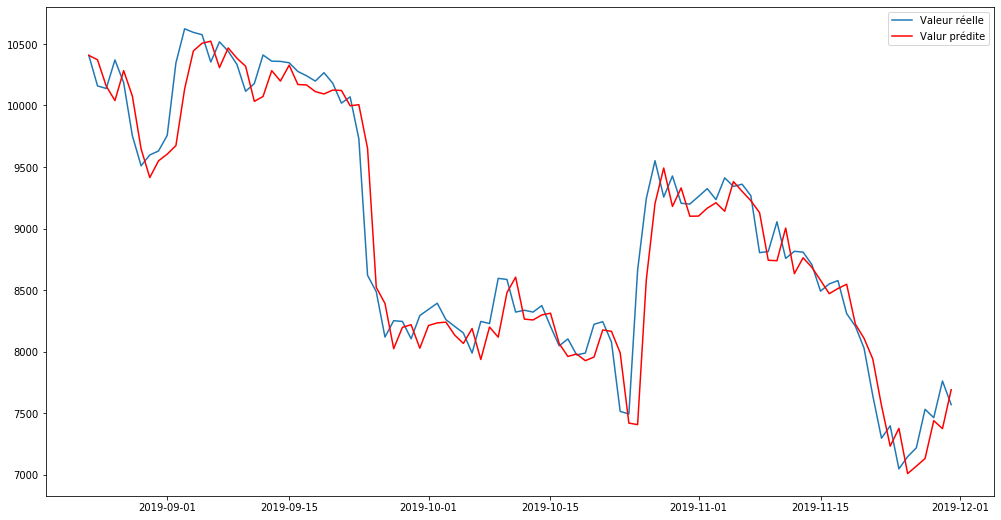

In [0]:
plt.figure(figsize=(17, 9))
plt.plot(df_result.index, df_result['BTC_Close_Reel'], label='Valeur réelle')
plt.plot(df_result.index, df_result['BTC_Close_Pred'], color='r', label='Valur prédite')
plt.legend()
plt.show()